In [7]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df.job_posted_date=pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

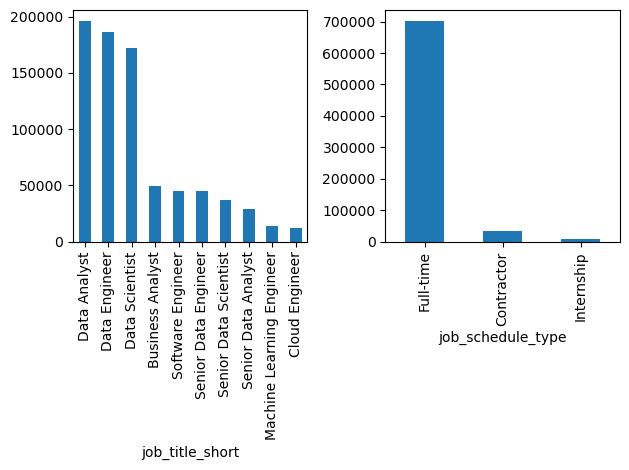

In [8]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax= ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax= ax[1])

fig.tight_layout()

In [9]:
df_skills = df.copy()
df_skills.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
139580,Data Scientist,Data Scientist,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-12-06 08:08:51,False,False,India,None,NaN,NaN,NMS Consultant,"[r, scala, python, matlab]","{'programming': ['r', 'scala', 'python', 'matl..."


In [10]:
df_skills = df_skills.explode('job_skills')
df_skills.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [11]:
df_skills_count = df_skills.groupby(['job_title_short','job_skills']).size().sort_values(ascending=False).reset_index(name='skill_count')
df_skills_count

,job_title_short,job_skills,skill_count
0,Data Scientist,python,113711
1,Data Engineer,sql,113130
2,Data Engineer,python,108022
3,Data Analyst,sql,92428
4,Data Scientist,sql,78982
...,...,...,...
2251,Cloud Engineer,delphi,1
2252,Senior Data Scientist,objective-c,1
2253,Senior Data Analyst,couchdb,1
2254,Cloud Engineer,haskell,1


In [12]:
job_titles = ['Data Analyst','Data Scientist','Data Engineer']

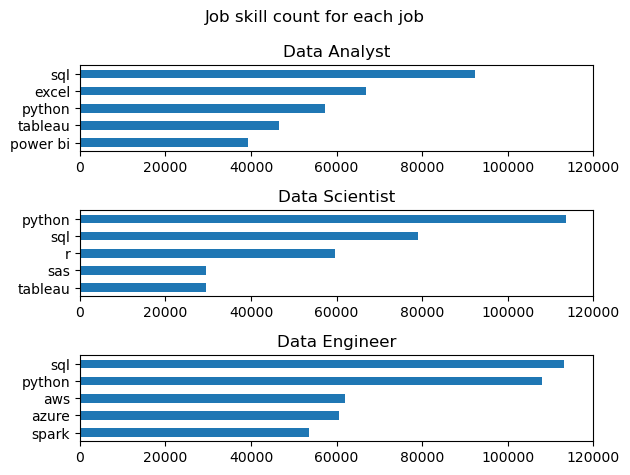

In [15]:
fig, ax = plt.subplots(3, 1)

df_plt = 0
for i,job_title in enumerate(job_titles):
    df_plt = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plt.plot(kind='barh', x='job_skills', y='skill_count', ax = ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

plt.suptitle('Job skill count for each job')
plt.tight_layout()